In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/kaggle/input/real-estate-data-uae/uae_properties.csv")
df

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,buy,8.171857e+08,apartment,3950000
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,buy,8.171857e+08,apartment,2600000
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,buy,2.125966e+09,apartment,3450000
3,11176502,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",2,3,2024-03-04T06:53:51+00:00,buy,7.114978e+10,apartment,2000000
4,11179908,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",2,0,2024-03-04T13:24:39+00:00,buy,4.652616e+08,apartment,284000
...,...,...,...,...,...,...,...,...,...,...
487,11221319,Best Offer | Limited 3 Bed | Furnished Serviced,"North 43 Residences, Jumeirah Village Circle, ...",2,3,2024-03-12T08:31:25+00:00,buy,4.560277e+08,apartment,1914927
488,10837884,LUXURY FLAT | GOLDEN VISA | GREAT VIEW | FLEXI...,"Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-06T17:09:49+00:00,buy,8.171857e+08,apartment,2650000
489,11134630,Magnificent| Luxurious l High ROI,"310 Riverside Crescent, Sobha Hartland II, Moh...",2,3,2024-02-26T06:31:21+00:00,buy,1.733539e+08,apartment,2191944
490,11151144,Full Burj Khalifa | High Floor | Confirm Seller,"Boulevard Point, Downtown Dubai, Dubai",2,3,2024-02-28T07:11:49+00:00,buy,6.512528e+09,apartment,6600000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              492 non-null    int64  
 1   title           492 non-null    object 
 2   displayAddress  492 non-null    object 
 3   bathrooms       492 non-null    int64  
 4   bedrooms        492 non-null    int64  
 5   addedOn         492 non-null    object 
 6   type            492 non-null    object 
 7   rera            323 non-null    float64
 8   propertyType    492 non-null    object 
 9   price           492 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 38.6+ KB


In [4]:
df['rera'].fillna(df['rera'].mean(),inplace = True)

/tmp/ipykernel_18/4177135682.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rera'].fillna(df['rera'].mean(),inplace = True)


In [5]:
df.isnull().sum()

id                0
title             0
displayAddress    0
bathrooms         0
bedrooms          0
addedOn           0
type              0
rera              0
propertyType      0
price             0
dtype: int64

In [6]:
df[['bathrooms', 'bedrooms', 'price']].describe()


,bathrooms,bedrooms,price
count,492.0,492.000000,4.920000e+02
mean,2.0,2.140244,2.166491e+06
std,0.0,1.357879,2.126998e+06
min,2.0,0.000000,2.330000e+05
25%,2.0,0.000000,9.529638e+05
50%,2.0,3.000000,1.499000e+06
75%,2.0,3.000000,2.434250e+06
max,2.0,3.000000,1.450000e+07


- Bathrooms:
   - All properties in the dataset have 2 bathrooms.
- Bedrooms:
   - The average number of bedrooms is approximately 2.14.
   - The minimum number of bedrooms is 0, indicating studio apartments.
   - The maximum number of bedrooms is 3.
- Price:
  - The average price of properties is approximately AED 2,166,491.
  - Prices range from AED 233,000 to AED 14,500,000.
  - The median price is AED 1,499,000.

In [7]:
df[df['price']== df['price'].max()]

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
25,11075687,Sea View | Fully Furnished | High Floor | Vacant,"Apartment Building 7, Bluewaters Residences, B...",2,3,2024-02-15T08:18:38+00:00,buy,7.148981e+09,apartment,14500000


 -  The property with the highest price in the dataset is a fully furnished apartment located in Apartment Building 7, Bluewaters Residences, with a sea view. It has 2 bathrooms and 3 bedrooms

In [8]:
df[df['price']== df['price'].min()]

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
463,11085519,1% MONTHLY-HOT AREA-HEART OF AJMAN,"Garden Residences, Emirates City, Ajman",2,0,2024-02-17T03:41:03+00:00,buy,1.562928e+10,apartment,233000


 - The property with the lowest price in the dataset is located in Garden Residences, Emirates City, Ajman. It comprises 2 bathrooms and 0 bedrooms, indicating it might be a studio or a one-room unit

In [9]:
df['displayAddress'].value_counts().head(10)

displayAddress
Reeman Living, Al Shamkha, Abu Dhabi                            26
Reeman Living II, Al Shamkha, Abu Dhabi                         15
Diva, Yas Island, Abu Dhabi                                     12
Binghatti Crest, Jumeirah Village Circle, Dubai                 11
Radiant Boulevard, City Of Lights, Al Reem Island, Abu Dhabi    11
Verdana 2, Dubai Investment Park, Dubai                         10
Radiant Square, City Of Lights, Al Reem Island, Abu Dhabi       10
Al Mamsha, Muwaileh, Sharjah                                     9
Red Square Tower, Jumeirah Village Triangle, Dubai               7
Azizi Venice, Dubai South (Dubai World Central), Dubai           7
Name: count, dtype: int64

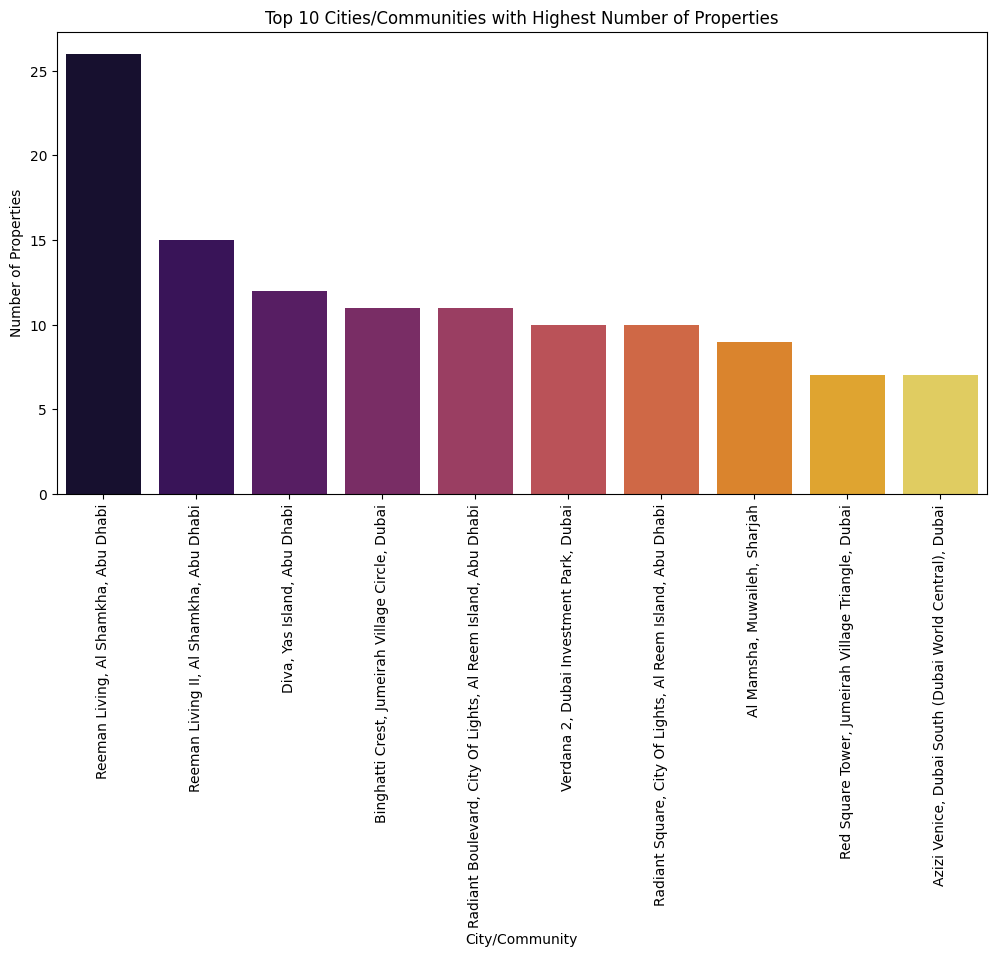

In [10]:
plt.figure(figsize=(12, 6))
top_10_cities = df['displayAddress'].value_counts().head(10)
sns.barplot(x=top_10_cities.index, y=top_10_cities.values,palette = 'inferno')
plt.title('Top 10 Cities/Communities with Highest Number of Properties')
plt.xlabel('City/Community')
plt.ylabel('Number of Properties')
plt.xticks(rotation=90)
plt.show()

 - The city/community "Reeman Living, Al Shamkha, Abu Dhabi" has the highest number of properties listed, with 26 properties.
 - Following closely is "Reeman Living II, Al Shamkha, Abu Dhabi" with 15 properties.
 - Other prominent locations include "Diva, Yas Island, Abu Dhabi" with 12 properties and "Binghatti Crest, Jumeirah Village Circle, Dubai" with 11 properties.
 - The graph provides insights into the concentration of property listings across various regions, helping to identify areas with high market activity and demand

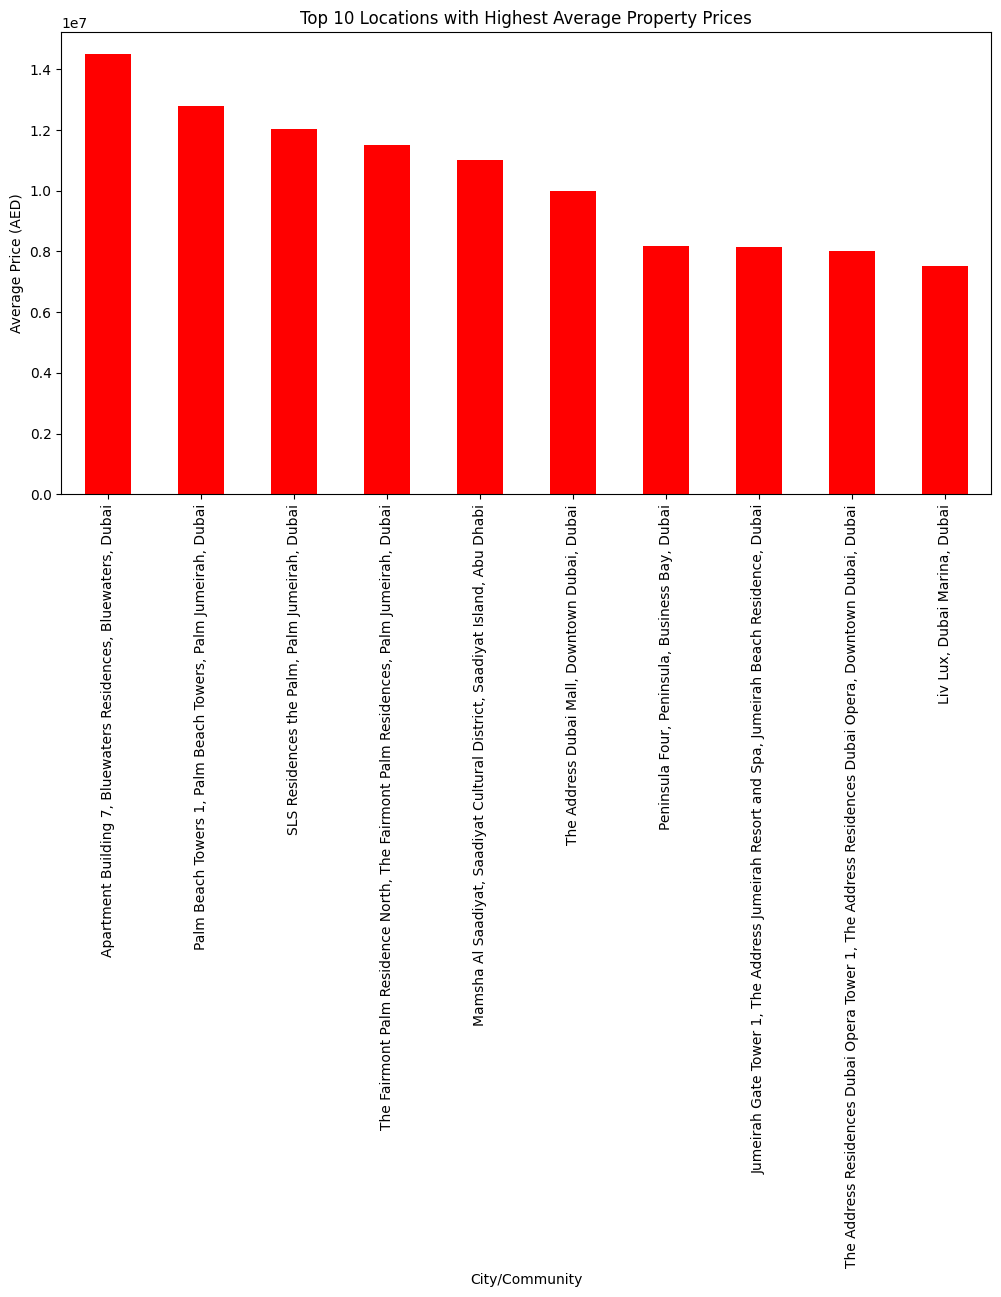

In [11]:
top_10_avg_prices = df.groupby('displayAddress')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_avg_prices.plot(kind='bar', color='red')
plt.title('Top 10 Locations with Highest Average Property Prices')
plt.xlabel('City/Community')
plt.ylabel('Average Price (AED)')
plt.xticks(rotation=90)
plt.show()

 - Apartment Building 7, Bluewaters Residences in Bluewaters, Dubai, has the highest average price, followed by Palm Beach Towers 1 in Palm Jumeirah, Dubai
 - This analysis provides valuable insights into the luxury real estate market in Dubai and Abu Dhabi, showcasing the most desirable and expensive locations for property investment.

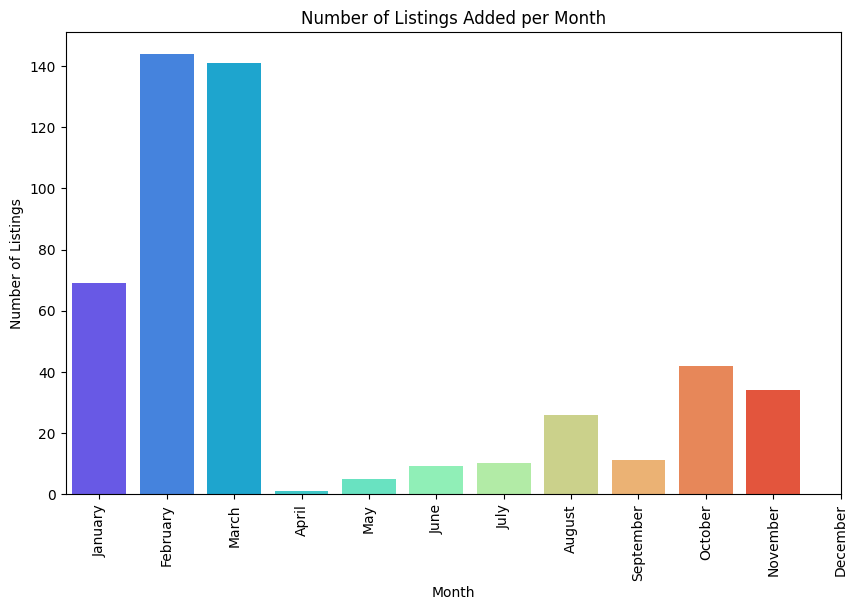

In [12]:
df['addedOn'] = pd.to_datetime(df['addedOn'])
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df['month_added'] = df['addedOn'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='month_added', data=df,palette = 'rainbow')
plt.title('Number of Listings Added per Month')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 90,ticks=range(12), labels=month_names)
plt.show()

 - February and march consistently have the highest number of listings added.
 - April to July experiences relatively lower listings, likely due to the summer season.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


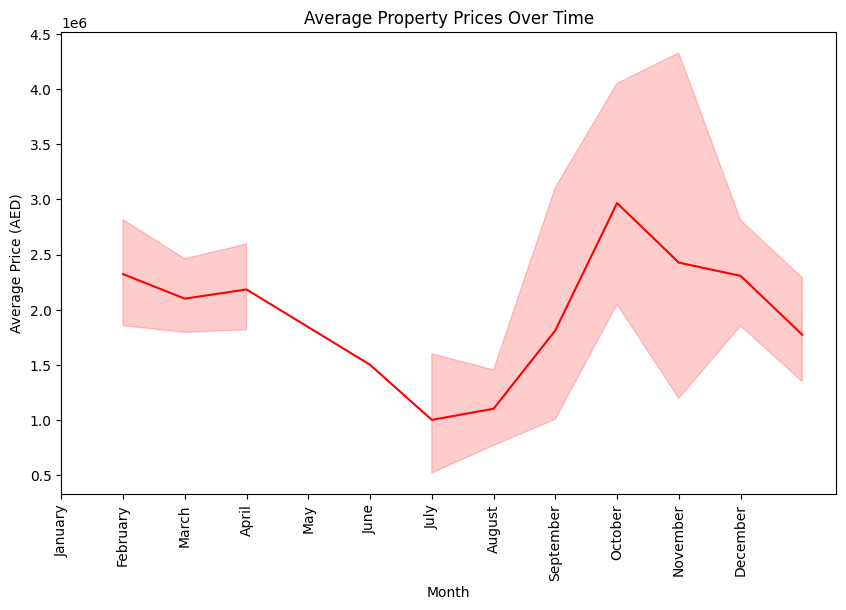

In [13]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='month_added', y='price', data=df,color = 'r')
plt.title('Average Property Prices Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price (AED)')
plt.xticks(rotation = 90,ticks=range(12), labels=month_names)
plt.show()


 - Prices remained relatively stable from January to March, hovering around 2.5 million AED
 - In July, there was a significant drop, with prices falling to just above 1 million AED.
 - From August to October, prices increased steadily, reaching a peak of nearly 4 million AED in August
 - October onwards, there was a sharp decline, and prices dropped back down to around 1.5 million AED by December